<a href="https://colab.research.google.com/github/Arush0113/CE784/blob/main/Arush_CE784_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ce784 assignment 2 dataset/cleaned.csv')

In [5]:
df.head(50)

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus
5,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.344,0.77,-9.13,-3.72,bus
6,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.403,0.80,-9.14,-3.76,bus
7,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.460,0.77,-9.12,-3.73,bus
8,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.519,0.77,-9.14,-3.73,bus
9,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.578,0.77,-9.10,-3.76,bus


In [6]:
df['user'][0]

'a2d80ed662f34d32951eb1c6ed076c313e358b73'

In [7]:
len(df[df['user'] == df['user'][0]]) 

3791

### Question 1

In [8]:
print(df.columns)
print(len(df.columns))
print(len(df))
print(df['user'].unique())
print(len(df['user'].unique()))

Index(['user', 'timestamp', 'x', 'y', 'z', 'class'], dtype='object')
6
5653053
['a2d80ed662f34d32951eb1c6ed076c313e358b73'
 'a526f3566e9c9024dfa7378eb4291d787a09fd37'
 'a59868c6eb3645eedbb343ce8c336ec6f2ef2324'
 'a92dee88f61123f923dccec01eeecf1a81953b36'
 'ac4c17afeb69b39169eb301ab592696a8f353976'
 'adaaae1a67ea9e43abd60ba945eccda0cb8821e0'
 'b138d165100ef60bc793cac143742eb5aea4d6ba'
 'b45157069942d01310c3e7b74034166717bb25f9'
 'b7b165e5637b5a0226068d907748f4bbfc61a320'
 'c453226e3616ae821cdcb38f38481c2a20f2482f'
 'c5702d34b238fe68683f818e82cd3a3cd8a16366'
 'ca7950f223a8037b897d0547075dc138f9e43b20'
 'cace4ec0999436917986b4fa6e9317262c897bc2'
 'cbde60baea002b694ecf2a3ff2d95be16b00efe1'
 'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c'
 'd429974540bfd38c3367fe9f0c8682775ff4fa18'
 'd7a1230d94f91a32cc079809748e52e8a4a6a22f'
 'd7dd12d83c81574137f858034b99f4cc83ab0718'
 'd8c047eaaee204b7b5cd71e2d67308b87b038ed3'
 'dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120'
 'dd82e3df4bebc74ed6b67877be79e29f401c16a

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB


### Question 2

In [10]:
user_changed=[]
for i in range(len(df['user'])-1):
  if (df['user'][i] != df['user'][i+1]):
    user_changed.append(1)
  else:
    user_changed.append(0)
user_changed.append(1)
df['user_c'] = user_changed

In [11]:
df['user_shifted'] = df['user'].shift(1, axis = 0)
df['class_shifted'] = df['class'].shift(1, axis = 0)

In [12]:
class_changed=[]
for i in range(len(df['user'])-1):
  if (df['class'][i] != df['class'][i+1]):
    class_changed.append(1)
  else:
    class_changed.append(0)
class_changed.append(1)
df['class_c'] = class_changed

In [13]:
# sum(df['class_c'])

In [14]:
df.head()

,user,timestamp,x,y,z,class,user_c,user_shifted,class_shifted,class_c
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,0,NaN,NaN,0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0


In [15]:
df['timestamp_shifted'] = df['timestamp'].shift(1, axis=0)

In [16]:
# a_timedelta = datetime.datetime.strptime(df['timestamp'][1]) - datetime.datetime.strptime(df['timestamp'][0])

df['timestamp'] = df['timestamp'].astype('datetime64[s]')
df['timestamp_shifted'] = df['timestamp_shifted'].astype('datetime64[s]')

In [17]:
df['time_diff'] = (df['timestamp'] - df['timestamp_shifted'])/np.timedelta64(1, 's')

In [18]:
# datetime.datetime.strptime(df['timestamp'][1], %d)

In [19]:
df['time_diff'].unique()

array([           nan,  0.0000000e+00,  1.0000000e+00,  7.3000000e+01,
        1.5000000e+01,  5.0000000e+00,  1.7500000e+02,  1.0000000e+01,
        8.0000000e+00,  3.0000000e+01,  6.1000000e+01,  6.4000000e+01,
        7.7000000e+01,  8.4000000e+01,  3.3000000e+01,  5.7000000e+01,
        1.0100000e+02,  4.0000000e+00, -1.0000000e+00, -4.7666490e+06,
        2.0000000e+00,  2.0000000e+01,  1.6000000e+01,  2.6000000e+01,
        2.5450000e+03,  3.0000000e+00,  7.0000000e+00,  9.0000000e+00,
        1.1000000e+01,  6.0000000e+00,  2.2000000e+01,  1.4000000e+01,
        2.2641000e+04,  4.1241000e+04, -6.0000000e+00,  1.9646000e+04,
        2.3990000e+03,  1.8393000e+04,  1.3411600e+05,  1.8000000e+01,
        8.4981000e+04, -5.9000000e+01,  6.0000000e+01,  2.5000000e+01,
        1.9000000e+01,  2.0500000e+02,  5.1372000e+04,  3.7490900e+05,
        2.5964000e+04, -7.8346100e+05,  1.4360000e+04,  4.3000000e+03,
        4.7926000e+04,  1.3057000e+04,  3.9730000e+03, -2.2000000e+01,
      

In [20]:
df['seq_new'] = df['user_c'] | df['class_c'] | (df['time_diff'] > 10)

In [21]:
# df['seq_new'] = df['user'] != df['user_shifted'] | df['class_c'] != df['class_shifted'] | (df['time_diff'] > 10)

In [22]:
df['seq_new'].sum()

3494

In [23]:
df[df['seq_new'] == 1]

,user,timestamp,x,y,z,class,user_c,user_shifted,class_shifted,class_c,timestamp_shifted,time_diff,seq_new
86,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:28:14,0.84,-9.14,-3.78,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:27:01,73.0,True
218,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:28:33,2.78,-8.93,-3.23,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:28:18,15.0,True
601,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:31:41,1.36,-9.37,-2.78,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:28:46,175.0,True
984,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:32:43,1.78,-9.91,-1.03,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:32:13,30.0,True
1020,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:33:44,1.83,-9.59,-0.62,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:32:43,61.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650814,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:02:25,10.71,3.76,1.16,bike,0,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,0,2019-09-13 17:02:00,25.0,True
5651366,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:03:03,10.27,3.81,-1.21,bike,0,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,0,2019-09-13 17:02:37,26.0,True
5651920,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:03:41,10.31,1.34,-0.08,bike,0,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,0,2019-09-13 17:03:15,26.0,True
5652496,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:19,11.42,0.93,0.44,bike,0,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,0,2019-09-13 17:04:01,18.0,True


In [47]:
df1 = df.groupby(['user', 'class']).seq_new.sum()
df1

user                                      class 
a2d80ed662f34d32951eb1c6ed076c313e358b73  bus        12
a526f3566e9c9024dfa7378eb4291d787a09fd37  car        17
                                          walk       22
a59868c6eb3645eedbb343ce8c336ec6f2ef2324  bike       40
                                          bus        20
                                          car        69
                                          walk       13
a92dee88f61123f923dccec01eeecf1a81953b36  bus         3
ac4c17afeb69b39169eb301ab592696a8f353976  car        21
                                          walk       58
adaaae1a67ea9e43abd60ba945eccda0cb8821e0  bus        24
                                          car        20
                                          walk       11
b138d165100ef60bc793cac143742eb5aea4d6ba  car        10
b45157069942d01310c3e7b74034166717bb25f9  car         5
                                          walk        4
b7b165e5637b5a0226068d907748f4bbfc61a320  car       194

### Question 3

In [25]:
df['seq'] = df['seq_new'].cumsum(axis = 0, skipna = True)

In [26]:
df['seq'] = df['seq'] + 1

In [27]:
df['seq']

0             1
1             1
2             1
3             1
4             1
           ... 
5653048    3494
5653049    3494
5653050    3494
5653051    3494
5653052    3495
Name: seq, Length: 5653053, dtype: int64

In [32]:
df['min_t'] = df.groupby('seq').timestamp.transform('min')

In [33]:
df['min_t'][:20]

0    2018-06-04 16:26:55
1    2018-06-04 16:26:55
2    2018-06-04 16:26:55
3    2018-06-04 16:26:55
4    2018-06-04 16:26:55
5    2018-06-04 16:26:55
6    2018-06-04 16:26:55
7    2018-06-04 16:26:55
8    2018-06-04 16:26:55
9    2018-06-04 16:26:55
10   2018-06-04 16:26:55
11   2018-06-04 16:26:55
12   2018-06-04 16:26:55
13   2018-06-04 16:26:55
14   2018-06-04 16:26:55
15   2018-06-04 16:26:55
16   2018-06-04 16:26:55
17   2018-06-04 16:26:55
18   2018-06-04 16:26:55
19   2018-06-04 16:26:55
Name: min_t, dtype: datetime64[ns]

In [34]:
df['window_this_seq'] = (df['timestamp'] - df['min_t'])//np.timedelta64(5, 's')

In [35]:
df['window_this_seq'][:60]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: window_this_seq, dtype: int64

In [36]:
df['window_id'] = df['seq'].astype('str') + "." + df['window_this_seq'].astype('str')

In [37]:
df['window_id']

0             1.0
1             1.0
2             1.0
3             1.0
4             1.0
            ...  
5653048    3494.2
5653049    3494.2
5653050    3494.2
5653051    3494.2
5653052    3495.0
Name: window_id, Length: 5653053, dtype: object

In [38]:
df.head()

,user,timestamp,x,y,z,class,user_c,user_shifted,class_shifted,class_c,timestamp_shifted,time_diff,seq_new,seq,min_t,window_this_seq,window_id
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,0,NaN,NaN,0,NaT,NaN,False,1,2018-06-04 16:26:55,0,1.0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0


In [39]:
prob_3 = df.drop(['timestamp','x','y','z','user_c','user_shifted', 'class_shifted','class_c', 'timestamp_shifted', 'time_diff', 'seq_new', 'seq', 'min_t', 'window_this_seq'], axis = 1)

In [40]:
prob_3

,user,class,window_id
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1.0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1.0
...,...,...,...
5653048,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3494.2
5653049,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3494.2
5653050,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3494.2
5653051,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,bike,3494.2


In [41]:
sol_3 = prob_3.groupby(['user','class']).nunique()
pd.set_option('display.max_rows',None, 'display.max_columns',None)
sol_3

window_id
user                                     class            
a2d80ed662f34d32951eb1c6ed076c313e358b73 bus            35
a526f3566e9c9024dfa7378eb4291d787a09fd37 car          1546
                                         walk          302
a59868c6eb3645eedbb343ce8c336ec6f2ef2324 bike          572
                                         bus          3854
                                         car          2090
                                         walk          827
a92dee88f61123f923dccec01eeecf1a81953b36 bus           730
ac4c17afeb69b39169eb301ab592696a8f353976 car            63
                                         walk          480
adaaae1a67ea9e43abd60ba945eccda0cb8821e0 bus          1160
                                         car           537
                                         walk          155
b138d165100ef60bc793cac143742eb5aea4d6ba car           416
b45157069942d01310c3e7b74034166717bb25f9 car           430
                                         walk           76
b7b165e5637b5a0226068d907748f4bbfc61a320 car          2135
                                         walk          206
c453226e3616ae821cdcb38f38481c2a20f2482f bike          502
                                         bus          1469
c5702d34b238fe68683f818e82cd3a3cd8a16366 bike          204
                                         bus           200
                                         walk         1243
ca7950f223a8037b897d0547075dc138f9e43b20 walk           65
cace4ec0999436917986b4fa6e9317262c897bc2 car          1151
cbde60baea002b694ecf2a3ff2d95be16b00efe1 bus           414
ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c bus           448
                                         car           506
d429974540bfd38c3367fe9f0c8682775ff4fa18 bus           521
                                         car           921
                                         walk          102
d7a1230d94f91a32cc079809748e52e8a4a6a22f bike          369
                                         train         420
                                         walk           81
d7dd12d83c81574137f858034b99f4cc83ab0718 car           674
d8c047eaaee204b7b5cd71e2d67308b87b038ed3 car          1762
                                         walk          165
dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120 bike          574
                                         car           148
                                         walk           37
dd82e3df4bebc74ed6b67877be79e29f401c16a3 car           940
                                         walk          237
dde95e125d89843f7032baa734ee4d34ec775aaf bus            35
                                         car            43
                                         walk           51
de9892b879c83ea3d24fb4560873107cc4e86d48 car           925
                                         walk          337
dfcfc0404691b73b69884073159f90843f2ac35b bus           441
                                         car          1271
                                         walk          797
e429a95c532f1117130c11e4a18379d84fa4ffa9 bus           620
                                         car           185
eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076 bus           359
                                         train         159
                                         walk          198
ecfb0929250fb6dda66a4065441230ab27f094e5 car          1029
                                         e-bike         81
                                         train          22
ed623d28c1e0071632a6110b8f8ed93f8af78b99 bus            72
                                         car          2175
                                         walk           17
f1b7331b66e404c11eebb22933e733117bbb12c9 bike          397
                                         car           779
                                         walk          199
f5edd999397145a2ec1b244226fc83f99631760c bus           303
                                         walk          120
f7ae1ce141c26db40ea8b090fb568a0c96531

In [42]:
prob_3_new = df.drop(['timestamp','x','y','z','user_c','user_shifted', 'class_shifted','class_c', 'timestamp_shifted', 'time_diff', 'seq_new', 'seq', 'min_t', 'window_this_seq', 'user'], axis = 1)

In [44]:
sol_3_new = prob_3_new.groupby(['class']).nunique()
pd.set_option('display.max_rows',None, 'display.max_columns',None)
# sol_3

In [45]:
sol_3_new

,window_id
class,
bike,3161
bus,10661
car,20242
e-bike,81
train,601
walk,5847


In [53]:
df.groupby(['window_id'])['x'].mean()

window_id
1.0             8.001408e-01
1.1             8.100000e-01
10.0            1.850496e+00
10.1            2.299412e+00
100.0           2.509722e-01
100.1           1.680556e-02
100.10          7.486111e-01
100.100        -1.150000e-01
100.101         1.230000e+00
100.102        -7.238095e-01
100.103        -7.854592e-01
100.104        -7.986667e-01
100.105        -8.117460e-01
100.106         2.744681e-01
100.107        -5.462963e-02
100.108        -7.738462e-01
100.109        -4.661225e-01
100.11          4.415069e-01
100.110        -8.858564e-01
100.111        -7.406757e-01
100.112         3.568919e-01
100.113        -6.438889e-01
100.114        -6.282192e-01
100.115        -6.454167e-01
100.116        -6.052000e-01
100.117        -2.590476e-01
100.118        -6.551389e-01
100.119        -5.821918e-01
100.12          2.683871e-01
100.120        -5.859722e-01
100.121        -5.832877e-01
100.122        -6.711111e-01
100.123        -5.837500e-01
100.124        -7.108333e-01
100.

### Question 4

In [67]:
df.head()

,user,timestamp,x,y,z,class,user_c,user_shifted,class_shifted,class_c,timestamp_shifted,time_diff,seq_new,seq,min_t,window_this_seq,window_id
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,0,NaN,NaN,0,NaT,NaN,False,1,2018-06-04 16:26:55,0,1.0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,0,2018-06-04 16:26:55,0.0,False,1,2018-06-04 16:26:55,0,1.0


In [79]:
features = {
    'meanX' : df.groupby(['window_id'])['x'].mean(),
    'stdX' : df.groupby(['window_id'])['x'].std(),
    'minX': df.groupby(['window_id'])['x'].min(),
    'maxX': df.groupby(['window_id'])['x'].max(),
    'meanY' : df.groupby(['window_id'])['y'].mean(),
    'stdY' : df.groupby(['window_id'])['y'].std(),
    'minY': df.groupby(['window_id'])['y'].min(),
    'maxY': df.groupby(['window_id'])['y'].max(),
    'meanZ' : df.groupby(['window_id'])['z'].mean(),
    'stdZ' : df.groupby(['window_id'])['z'].std(),
    'minZ': df.groupby(['window_id'])['z'].min(),
    'maxZ': df.groupby(['window_id'])['z'].max(),
    'class': df.groupby(['window_id'])['class'].max()
}

In [80]:
# df.groupby(['window_id'])['class'].max()

In [81]:
df_features = pd.DataFrame(features)

In [88]:
df_features.head()

,meanX,stdX,minX,maxX,meanY,stdY,minY,maxY,meanZ,stdZ,minZ,maxZ,class
window_id,,,,,,,,,,,,,
1.0,0.800141,0.022135,0.75,0.85,-9.127324,0.018513,-9.18,-9.08,-3.747606,0.028709,-3.81,-3.67,bus
1.1,0.810000,0.016903,0.77,0.83,-9.118000,0.016125,-9.14,-9.09,-3.747333,0.021202,-3.78,-3.70,bus
10.0,1.850496,0.586150,0.37,3.43,-8.079362,0.534036,-9.38,-7.10,-5.522057,0.646008,-6.40,-3.44,bus
10.1,2.299412,0.168355,1.97,2.52,-7.336471,0.243258,-7.75,-6.87,-6.140000,0.296036,-6.64,-5.72,bus
100.0,0.250972,0.098798,0.03,0.43,8.907778,0.122051,8.62,9.23,4.246111,0.145550,3.73,4.55,car


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

<Figure size 432x288 with 0 Axes>

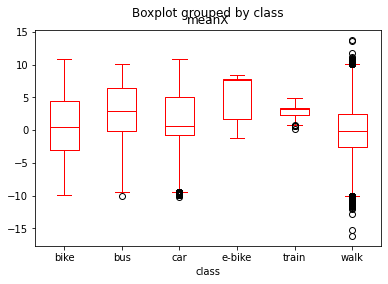

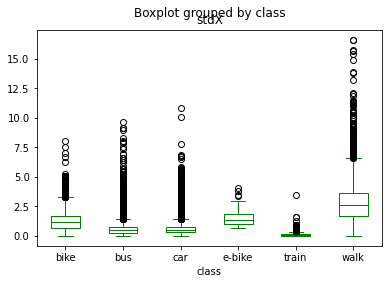

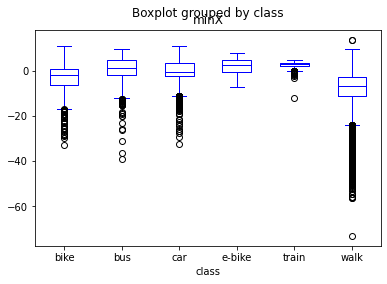

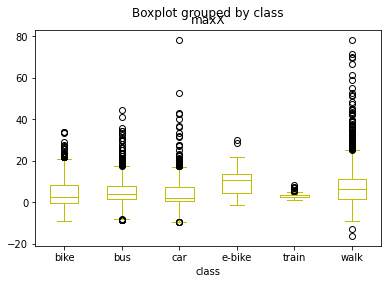

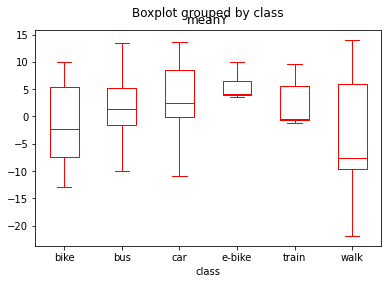

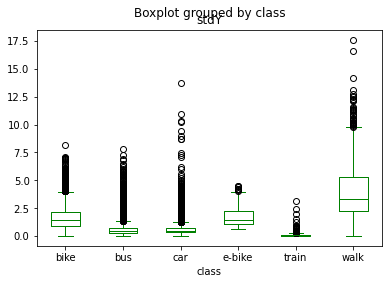

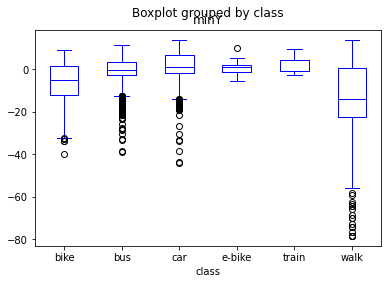

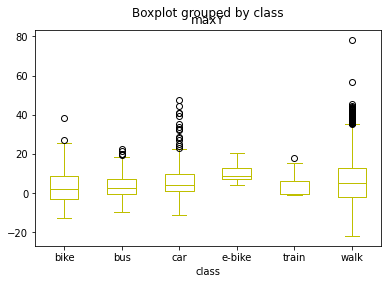

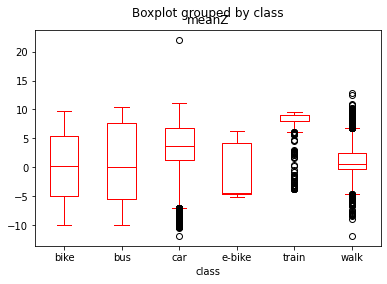

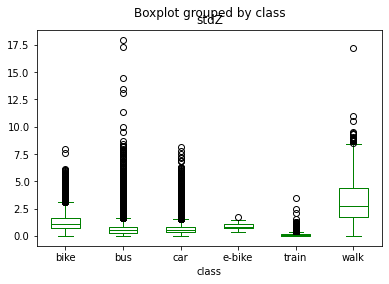

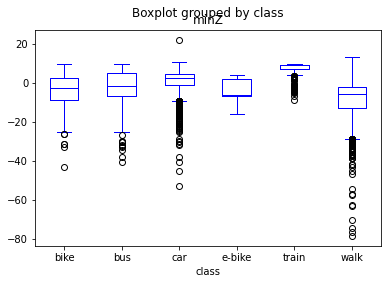

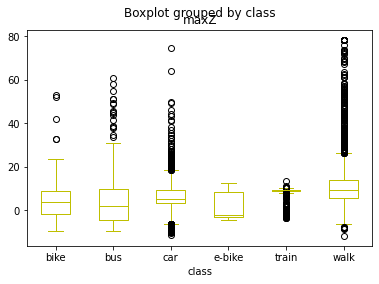

In [103]:
plt.figure()

df_features.boxplot(column = ['meanX'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdX'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minX'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxX'], by = 'class', grid = False, color = 'y')

df_features.boxplot(column = ['meanY'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdY'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minY'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxY'], by = 'class', grid = False, color = 'y')

df_features.boxplot(column = ['meanZ'], by = 'class', grid = False, color = 'r')
df_features.boxplot(column = ['stdZ'], by = 'class', grid = False, color = 'g')
df_features.boxplot(column = ['minZ'], by = 'class', grid = False, color = 'b')
df_features.boxplot(column = ['maxZ'], by = 'class', grid = False, color = 'y')

### Question 5

### Question 6

In [110]:
data = df_features.to_numpy()
print(data.shape)

(40593, 13)


In [107]:
X = data[:-1]
y = data[-1]

In [108]:
X

array([[0.8001408425854964, 0.022135491967534483, 0.75, ...,
        -3.809999942779541, -3.670000076293945, 'bus'],
       [0.8099999984105428, 0.01690307904956004, 0.7699999809265137, ...,
        -3.7799999713897705, -3.700000047683716, 'bus'],
       [1.8504964527508891, 0.5861500674686537, 0.3700000047683716, ...,
        -6.400000095367432, -3.440000057220459, 'bus'],
       ...,
       [8.286091974411887, 0.34971868604714357, 7.659999847412109, ...,
        -5.849999904632568, -3.470000028610229, 'bus'],
       [8.20833330684238, 0.40935480963454557, 7.400000095367432, ...,
        -5.860000133514404, -3.190000057220459, 'bus'],
       [8.051666577657064, 0.2598472171780208, 7.300000190734863, ...,
        -5.389999866485596, -4.039999961853027, 'bus']], dtype=object)

In [109]:
y

array([8.496555548244052, 0.3263858447779168, 7.659999847412109,
       9.4399995803833, 0.4640000006908344, 0.3378879513109919,
       -1.7999999523162842, 1.1399999856948853, -3.991277783446842,
       0.6381178998676386, -5.599999904632568, -2.5899999141693115, 'bus'],
      dtype=object)

In [112]:
permus = np.random.permutation(len(X))

X = X[permus]
y = y[permus]
X_train = X[:(int)(0.6*len(X))]
y_train = y[:(int)(0.6*len(y))]
X_val = X[(int)(0.6*len(X)):(int)(0.8*len(X))]
y_val = y[(int)(0.6*len(y)):(int)(0.8*len(y))]
X_test = X[(int)(0.8*len(X)):]
y_test = y[(int)(0.8*len(y)):]


### Question 7